In [149]:
# TITLE: Analysis of Obesity Levels Using the Apriori Algorithm
# 
# NAME: Tim# DATE: Dec 9 2020
# 
#

In [150]:
import pandas as pd

df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')


In [151]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
#import seaborn as sns

from sklearn.preprocessing import scale

%matplotlib inline
plt.style.use('seaborn-white')

In [152]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [153]:
# Plotting two variables against each other

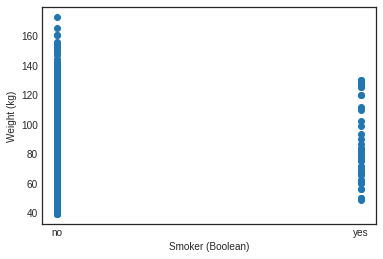

In [154]:
plt.figure()
plt.scatter(df['SMOKE'], df['Weight'])
plt.xlabel('Smoker (Boolean)')
plt.ylabel('Weight (kg)')
plt.show()

In [155]:
# From the graph above, it appears that smokers are more likely to have a lower weight than non-smokers.
# Thus, smokers are less likely to be overweight.

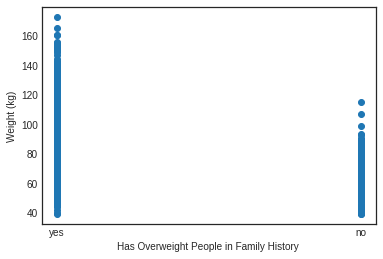

In [156]:
plt.figure()
plt.scatter(df['family_history_with_overweight'], df['Weight'])
plt.xlabel('Has Overweight People in Family History ')
plt.ylabel('Weight (kg)')
plt.show()

In [157]:
# This graph is evidence that people who have overweight people in their
# family history are more likely to be overweight.

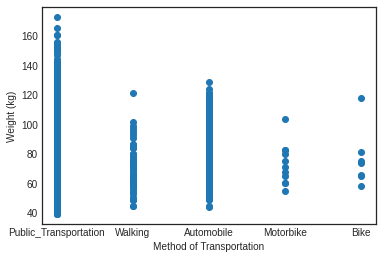

In [158]:
plt.figure()
plt.scatter(df['MTRANS'], df['Weight'])
plt.xlabel('Method of Transportation')
plt.ylabel('Weight (kg)')
plt.show()

In [159]:
# people that use public transport or an automobile are more likely
# to be overweight.  People that bike or walk are more likely
# not to be overweight.

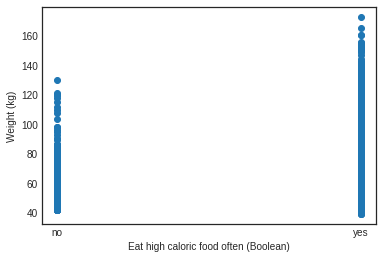

In [160]:
plt.figure()
plt.scatter(df['FAVC'], df['Weight'])
plt.xlabel('Eat high caloric food often (Boolean)')
plt.ylabel('Weight (kg)')
plt.show()

In [161]:
# people that consume high calorie food are more likely to be overweight

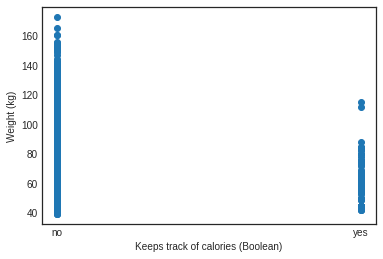

In [162]:
plt.figure()
plt.scatter(df['SCC'], df['Weight'])
plt.xlabel('Keeps track of calories (Boolean)')
plt.ylabel('Weight (kg)')
plt.show()

In [163]:
# people that keep track of calories are less likely to be overweight

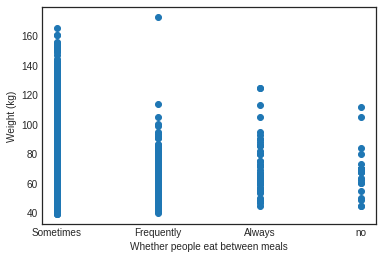

In [164]:
plt.figure()
plt.scatter(df['CAEC'], df['Weight'])
plt.xlabel('Whether people eat between meals')
plt.ylabel('Weight (kg)')
plt.show()

In [165]:
# people that eat between meals are more likely to be overweight

In [166]:
'''
MODIFY DOMAINS FOR APRIORI

We will modify domains so the data can be used with the
Apriori algorithm.
'''

'\nMODIFY DOMAINS FOR APRIORI\n\nWe will modify domains so the data can be used with the\nApriori algorithm.\n'

In [167]:
# get the column index of an attribute
def getColIndex(name):
    for i in range(df.shape[1]):
        if df.columns[i] == name:
            return i
    return 'none'

In [168]:
# modify family_history_with_overweight domain 

for i in range(df.shape[0]):
    x = getColIndex('family_history_with_overweight')
    if df.iloc[i,x] == 'yes':
        df.iloc[i,x] = 'fh_y'
    else:
        df.iloc[i,x] = 'fh_n'

In [169]:
# modify FAVC domain

for i in range(df.shape[0]):
    x = getColIndex('FAVC')
    if df.iloc[i,x] == 'yes':
        df.iloc[i,x] = 'fa_y'
    else:
        df.iloc[i,x] = 'fa_n'

In [170]:
# modify SMOKE domain

for i in range(df.shape[0]):
    x = getColIndex('SMOKE')
    if df.iloc[i,x] == 'yes':
        df.iloc[i,x] = 'sm_y'
    else:
        df.iloc[i,x] = 'sm_n'

In [171]:
# modify SCC domain

for i in range(df.shape[0]):
    x = getColIndex('SCC')
    if df.iloc[i,x] == 'yes':
        df.iloc[i,x] = 'sc_y'
    else:
        df.iloc[i,x] = 'sc_n'

In [172]:
# modify CAEC domain

for i in range(df.shape[0]):
    x = getColIndex('CAEC')
    if df.iloc[i,x] == 'no':
        df.iloc[i,x] = 'cae_no'
    elif df.iloc[i,x] == 'Sometimes':
        df.iloc[i,x] = 'cae_so'
    elif df.iloc[i,x] == 'Frequently':
        df.iloc[i,x] = 'cae_fr'
    else:
        df.iloc[i,x] = 'cae_al'
        

In [173]:
# modify MTRANS domain

for i in range(df.shape[0]):
    x = getColIndex('MTRANS')
    if df.iloc[i,x] == 'Automobile':
        df.iloc[i,x] = 'au'
    elif df.iloc[i,x] == 'Motorbike':
        df.iloc[i,x] = 'mo'
    elif df.iloc[i,x] == 'Public_Transportation':
        df.iloc[i,x] = 'pu'
    elif df.iloc[i,x] == 'Walking':
        df.iloc[i,x] = 'wa'
    else:
        df.iloc[i,x] = 'bi'

In [174]:
# modify NObeyesdad domain
# constrain domain to insufficient, normal, overweight and obese

for i in range(df.shape[0]):
    x = getColIndex('NObeyesdad')
    if df.iloc[i,x] == 'Insufficient_Weight':
        df.iloc[i,x] = 'ins'
    elif df.iloc[i,x] == 'Normal_Weight':
        df.iloc[i,x] = 'nrm'
    elif df.iloc[i,x] == 'Overweight_Level_I':
        df.iloc[i,x] = 'ovr'
    elif df.iloc[i,x] == 'Overweight_Level_II':
        df.iloc[i,x] = 'ovr'
    else:
        df.iloc[i,x] = 'ob'


In [175]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,fh_y,fa_n,2.0,3.0,cae_so,sm_n,2.0,sc_n,0.0,1.0,no,pu,nrm
1,Female,21.0,1.52,56.0,fh_y,fa_n,3.0,3.0,cae_so,sm_y,3.0,sc_y,3.0,0.0,Sometimes,pu,nrm
2,Male,23.0,1.80,77.0,fh_y,fa_n,2.0,3.0,cae_so,sm_n,2.0,sc_n,2.0,1.0,Frequently,pu,nrm
3,Male,27.0,1.80,87.0,fh_n,fa_n,3.0,3.0,cae_so,sm_n,2.0,sc_n,2.0,0.0,Frequently,wa,ovr
4,Male,22.0,1.78,89.8,fh_n,fa_n,2.0,1.0,cae_so,sm_n,2.0,sc_n,0.0,0.0,Sometimes,pu,ovr


In [176]:
# create subset of the data with only the variables we have chosen
sbsb = df.filter(items=['family_history_with_overweight', 'FAVC', 
                      'CAEC', 'SMOKE', 'SCC', 'MTRANS', 'NObeyesdad'])

In [177]:
sbsb.head()

,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,MTRANS,NObeyesdad
0,fh_y,fa_n,cae_so,sm_n,sc_n,pu,nrm
1,fh_y,fa_n,cae_so,sm_y,sc_y,pu,nrm
2,fh_y,fa_n,cae_so,sm_n,sc_n,pu,nrm
3,fh_n,fa_n,cae_so,sm_n,sc_n,wa,ovr
4,fh_n,fa_n,cae_so,sm_n,sc_n,pu,ovr


In [178]:
# examine all 2111 rows for 7 predictors
sbsb.shape

(2111, 7)

In [179]:
# make sure no singleton hashes collide
# there should be 21 singletons
def checkSinglHashes():
    tmp = list(filter((0).__ne__, bit_array_s)) # remove all indices with 0 from bit_array_s
    if len(tmp) != len(singletons):
        print("ERROR: singletons are being hashed to the same index.")
    else:
        print("No hash collisions.")
        

In [180]:
def getHashIndex(hash_object):
    hash_hex = hash_object.hexdigest()
    hash_int = int(hash_hex, 16)
    hash_abs = abs(hash_int)
    hash_index = hash_abs % len(bit_array_s)
    return hash_index

In [181]:
import hashlib

bit_array_s = [0] * 10000  # bit array containing index of hashed singletons
singletons = []
frequent_singletons = []
s = 200  # threshhold

# populate singletons
# hash singletons to bit_array_s
# populate frequent_singletons
for i in range(len(sbsb)):
    basket = sbsb.loc[i] # get row 
    for j in range(len(basket)):
        item = basket[j]
        singletons.append(item)
        hash_object = hashlib.md5(item.encode())
        hash_index = getHashIndex(hash_object)
        bit_array_s[hash_index] += 1
        
        if bit_array_s[hash_index] >= s:
            frequent_singletons.append(item)

# remove duplicates in singletons
singletons = set(singletons) 
singletons = list(singletons)
frequent_singletons = set(frequent_singletons) 
frequent_singletons = list(frequent_singletons)

# print frequent singletons
for sing in frequent_singletons:
    hash_object = hashlib.md5(sing.encode())
    hash_index = getHashIndex(hash_object)
    print("item:%s \t\tfrequency:%s" % (sing, bit_array_s[hash_index]))   
    

item:nrm 		frequency:287
item:sm_n 		frequency:2067
item:fh_y 		frequency:1726
item:ob 		frequency:972
item:ovr 		frequency:580
item:pu 		frequency:1580
item:sc_n 		frequency:2015
item:fh_n 		frequency:385
item:ins 		frequency:272
item:au 		frequency:457
item:cae_fr 		frequency:242
item:fa_n 		frequency:245
item:cae_so 		frequency:1765
item:fa_y 		frequency:1866


In [182]:
# make sure no hashes collide
checkSinglHashes()

No hash collisions.


In [183]:
# examine doubletons

doubletons = []
frequent_doubletons = []

# populate doubletons
for i in range(len(frequent_singletons)):
    for j in range(i + 1, len(frequent_singletons)):
        doubletons.append([frequent_singletons[i], frequent_singletons[j]])
        
d_dict = {}
d_index = 0
d_array = []
        
# receives a doubleton
# returns a concatenation of the strings in the doubleton
def getConcatString(array):
    string = ""
    for item in d:
        string += item  # concatenate words in doubleton, then hash them.  e.g., "sc_nfh_n"
    return string    

# populate frequent_doubletons
for d in doubletons:
    for i in range(len(sbsb)):
        count = 0
        basket = sbsb.loc[i] # get row 
        for item in basket:
            if d[0] == item or d[1] == item:
                count += 1
        if count == 2:
            string = getConcatString(d);
            if None == d_dict.get(string):
                d_dict.update({string : d_index})
                d_array.append(0)
                d_index += 1
            else:
                d_array[d_dict.get(string)] += 1
                if d_array[d_dict.get(string)] >= s:
                    if d not in frequent_doubletons:
                        frequent_doubletons.append(d)

# print frequent doubletons
for d in frequent_doubletons:
    string = getConcatString(d)
    print("item:%s \t\tfrequency:%s" % (d, d_array[d_dict.get(getConcatString(string))]))  

item:['nrm', 'sm_n'] 		frequency:273
item:['nrm', 'sc_n'] 		frequency:256
item:['nrm', 'fa_y'] 		frequency:207
item:['sm_n', 'fh_y'] 		frequency:1687
item:['sm_n', 'ob'] 		frequency:949
item:['sm_n', 'ovr'] 		frequency:571
item:['sm_n', 'pu'] 		frequency:1549
item:['sm_n', 'sc_n'] 		frequency:1975
item:['sm_n', 'fh_n'] 		frequency:378
item:['sm_n', 'ins'] 		frequency:270
item:['sm_n', 'au'] 		frequency:445
item:['sm_n', 'cae_fr'] 		frequency:232
item:['sm_n', 'fa_n'] 		frequency:234
item:['sm_n', 'cae_so'] 		frequency:1733
item:['sm_n', 'fa_y'] 		frequency:1831
item:['fh_y', 'ob'] 		frequency:963
item:['fh_y', 'ovr'] 		frequency:480
item:['fh_y', 'pu'] 		frequency:1270
item:['fh_y', 'sc_n'] 		frequency:1678
item:['fh_y', 'au'] 		frequency:406
item:['fh_y', 'cae_so'] 		frequency:1545
item:['fh_y', 'fa_y'] 		frequency:1579
item:['ob', 'pu'] 		frequency:758
item:['ob', 'sc_n'] 		frequency:968
item:['ob', 'au'] 		frequency:205
item:['ob', 'cae_so'] 		frequency:953
item:['ob', 'fa_y'] 		fre